In [42]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model, svm, ensemble

In [11]:
train = np.loadtxt('train.csv', delimiter=',', dtype='int')  # only a subset (5000) of original dataset
train_target = [x[0] for x in train]
train_data = [x[1:] for x in train]
test = np.loadtxt('test.csv', delimiter=',')  # only a subset (2000) of original dataset
test_target = [x[0] for x in test]
test_data = [x[1:] for x in test]

**Lets change form of some rows from a vector of length 784 to a 28x28 matrix to see how they look like.**

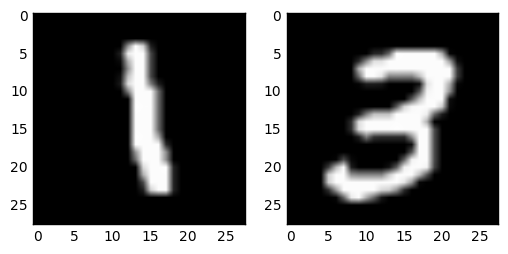

In [16]:
arrays_to_plot = [x.reshape(28, 28) for x in train_data[6:8]]
fig = plt.figure()
fig.add_subplot(1,2,1)
plt.imshow(arrays_to_plot[0], cmap=plt.cm.gray)
fig.add_subplot(1,2,2)
plt.imshow(arrays_to_plot[1], cmap=plt.cm.gray)
plt.show()






# Comparison of a few classification algorithms #

### Logistic regression: ###

In [19]:
one_vs_rest = linear_model.LogisticRegression(solver='liblinear', n_jobs=-1)
one_vs_rest.fit(train_data, train_target)
one_vs_rest.score(test_data, test_target)

0.78600000000000003

In [32]:
multinomial = linear_model.LogisticRegression(solver='lbfgs', multi_class='multinomial', tol=0.0001, n_jobs=-1)
multinomial.fit(train_data, train_target)
multinomial.score(test_data, test_target)

0.83799999999999997

### SVM: ###


In [41]:
svc = svm.SVC(cache_size=1000, kernel='poly', degree=3)
svc.fit(train_data, train_target)
svc.score(test_data, test_target)

0.92300000000000004

In [44]:
linear_svc = svm.LinearSVC()
linear_svc.fit(train_data, train_target)
linear_svc.score(test_data, test_target)

0.80533333333333335

### Random forest: ###

In [49]:
forest = ensemble.RandomForestClassifier(n_estimators=500, n_jobs=-1)
forest.fit(train_data, train_target)
forest.score(test_data, test_target)

0.92266666666666663